# 1.4 신경망으로 문제를 풀다
"드디어 준비끝!"<br>
간단한 데이터셋으로 신경망을 학습시켜보자!<br>

Code Editer - VScode에서 한참 헤매다가 다시 Jupyter Notebook으로 돌아왔다!<br>
Chap 1.4와 Chap 1.5를 마무리 짓자! -20.03.15.Sun - 

## 1.4.1 스파이럴 데이터셋

본 책에서는 데이터셋 클래스 몇 개를 dataset 디렉터리에 준비해뒀다고 한다. <br>
이번 절에서는 dataset/spiral.py를 이용한다.

github/WegraLee: https://github.com/WegraLee/deep-learning-from-scratch-2/blob/master/dataset/spiral.py

In [1]:
import sys
sys.path.append('..')  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
                       # sys.path.append('..')명령어를 사용하여 부모 디렉터리를 임포트 검색 경로에 추가
# print(sys.path)
from dataset import spiral

x, t = spiral.load_data()
print('x.shape: ', x.shape)  # (300, 2)  # 클래스당 요소(Feature)의 수는 2
print('t.shape: ', t.shape)  # (300, 3)  # 클래스의 수는 3

x.shape:  (300, 2)
t.shape:  (300, 3)


x는 2차원 데이터이고, t는 3차원 데이터이다.

t는 one-hot vector로 정답에 해당하는 클래스에는 1이, 그 외에는 0이 레이블 되어 있다.

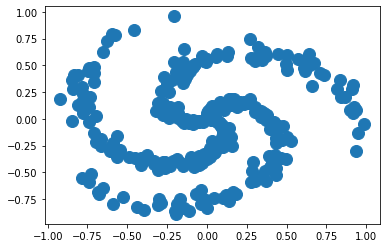

In [3]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x[:,0], x[:,1], marker='o', linestyle='', ms=12, label=t)
# ax.legend()

plt.show()

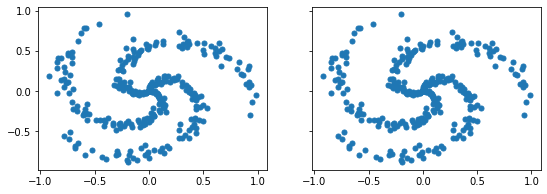

In [4]:
fig, ax = plt.subplots(1, 2, figsize = (9, 3), sharey=True)
ax[0].plot(x[:,0], x[:,1], marker='o', linestyle='', ms=5, label=t)
ax[1].plot(x[:,0], x[:,1], marker='o', linestyle='', ms=5, label=np.argmax(t, axis=1))
plt.show()

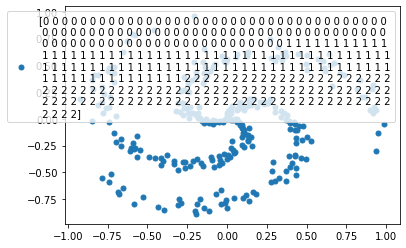

In [5]:
fig, ax = plt.subplots()

ax.plot(x[:,0], x[:,1], marker='o', linestyle='', ms=5, label=np.argmax(t, axis=1))
ax.legend()
plt.show()

In [6]:
# print(np.where(t[:, 0]==1))

In [7]:
colors = ("red", "green", "blue")
col = dict()
col["red"] = np.where(t[:, 0]==1)
col["green"] = np.where(t[:, 1]==1)
col["blue"] = np.where(t[:, 2]==1)

col

{'red': (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
         34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
         51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
         68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
         85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
        dtype=int64),),
 'green': (array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
         113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
         126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
         139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151,
         152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164,
         165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177,
         178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 18

In [8]:
len(col)

3

데이터셋처럼... 빙빙 돌아버리겠군...!! -20.03.11.wed am 6:35-

**deep-learning-2-github 참고하기!!**<br>
소중한 시간을 조금 더 효율적으로 보내기 위해...

* deep-learning-2에서 제시하는 scatterplot 예시

x.shape:  (300, 2)
y.shape:  (300, 3)


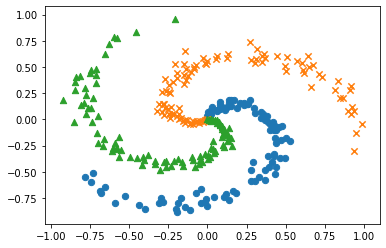

In [9]:
# reference: https://github.com/WegraLee/deep-learning-from-scratch-2/blob/master/ch01/show_spiral_dataset.py

# coding: utf-8
import sys
sys.path.append('..')  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
                       # 부모 디렉터리를 import 디렉터리에 추가한다.
from dataset import spiral
import matplotlib.pyplot as plt

x, t = spiral.load_data()
print('x.shape: ', x.shape)
print('y.shape: ', t.shape)

# 데이터점 플롯(Scatter plot)
N = 100      # 클래스별 데이터의 개수
CLS_NUM = 3  # 클래스의 수
makers = ['o', 'x', '^']
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=makers[i])
plt.show()

다음 스텝을 가기 전에 내가 위에서 작성했던 코드를 한 번 수정해보자! -20.03.11.Wed am7:16-

In [10]:
print('label_num: ', t.shape[1])


# col_label = np.ndarray([])\
col_label = np.ndarray(shape=(300,1))
for i in range(t.shape[1]):
#     print(i)
    for j in np.where(t[:, i]==1)[0].tolist():
        col_label[j] = i

#     col_label[np.where(t[:, i]==1)] = i+1
#     col_label[np.where(t[:, i+1]==1)] = i+2
#     col_label[np.where(t[:, i+2]==1)] = i+3
    
# print(col_label)

label_num:  3


In [11]:
# coding: utf-8

import sys
sys.path.append('..')


from dataset import spiral
import matplotlib.pyplot as plt

import numpy as np


markers = ['o', 'x', '^']
colors = ['red', 'green', 'blue']
# fig, ax = plt.subplots()
NUM = 100
CLS_NUM=3

for i in range(t.shape[1]):
    plt.scatter(x[i*N:(i+1)*N, 0])
    
    j = i*100
    end = (i+1)*100
    
    for j in range(end):
        plt.scatter(x[j, 0], x[j, 1], s=50, marker=markers[i])
plt.show()

# makers = ['o', 'x', '^']
# for i in range(CLS_NUM):
#     plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=makers[i])
# plt.show()

TypeError: scatter() missing 1 required positional argument: 'y'

In [12]:
print(type(col_label))
print('col_label.shape: ', col_label.shape)

<class 'numpy.ndarray'>
col_label.shape:  (300, 1)


In [13]:
colors[int(100/100)]

'green'

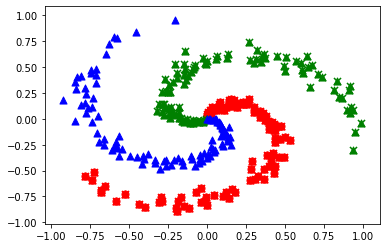

In [14]:
# coding: utf-8

import sys
sys.path.append('..')


from dataset import spiral
import matplotlib.pyplot as plt

import numpy as np


markers = ['o','x','^']
colors = ['red', 'green', 'blue']

fig, ax = plt.subplots()
for i in range(t.shape[1]):    
    j = i*100
    end = (i+1)*100
    
    for j in range(end):
        ax.scatter(x[j, 0], x[j, 1], c=colors[int(j/100)], s=50, marker=markers[i])  # 어제는 미쳐 몰랐었는데 
                                                                                     # color 인덱스를 저렇게 해도 되긴 되는구나...
                                                                                     # 분명 찾아보면 더 좋은 방법은 있을듯하다.
plt.show()

## 1.4.2 신경망 구현

은닉층이 하나인 신경망을 구현한다.

In [15]:
import sys
sys.path.append('..')
import numpy as np
from common.layers import Affine, Sigmoid, SoftmaxWithLoss

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size
        
        
        # 가중치와 편향 초기화
        W1 = 0.01 * np.random.randn(I, H)
        b1 = np.zeros(H)
        W2 = 0.01 * np.random.randn(H, O)
        b2 = np.zeros(O)
        
        # 계층 생성
        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b)
        ]
        self.loss_layer = SoftmaxWithLoss()
        
        # 모든 가중치와 기울기를 리스트에 모은다.
        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads
        

## 1.4.3 학습용 코드

학습 데이터를 읽어 들여 신경망(모델)과 옵티마이져(최적화기)를 생성한다.

* Again. 신경망의 학습 순서
    * 1단계: 미니배치
        * 훈련 데이터 중에서 무작위로 다수의 데이터를 골라낸다.
    * 2단계: 기울기 계산
        * 오차역전파법으로 각 가중치 매개변수에 대한 손실함수의 기울기를 구한다.
    * 3단계: 매개변수 갱신
        * 기울기를 사용하여 가중치 매개변수를 갱신한다.
    * 4단계: 반복
        * 1~3단계를 필요한 만큼 반복한다.

In [16]:
import sys
sys.path.append('..')
import numpy as np
from common.optimizer import SGD
from dataset import spiral
import matplotlib.pyplot as plt
from common.layers import Affine, SoftmaxWithLoss, Softmax


class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size

        # 가중치와 편향 초기화
        W1 = 0.01 * np.random.randn(I, H)
        b1 = np.zeros(H)
        W2 = 0.01 * np.random.randn(H, O)
        b2 = np.zeros(O)

        # 계층 생성
        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]
        self.loss_layer = SoftmaxWithLoss()

        # 모든 가중치와 기울기를 리스트에 모은다.
        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads

    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x

    def forward(self, x, t):
        score = self.predict(x)  # predict()를 어떻게 사용할 수 있는거지?
        loss = self.loss_layer.forward(score, t)
        return loss

    def backward(self, dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout

In [17]:
# #1. 하이퍼 파라미터 설정
max_epoch = 300      # 학습하는 에폭 수
batch_size = 30      # 미니배치 크기
hidden_size = 10     # 은닉층의 뉴런수
learning_rate = 1.0  # 학습률


# #2. 데이터 읽기
x, t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

# 학습에 사용하는 변수
data_size = len(x)
max_iters = data_size // batch_size
total_loss = 0
loss_count = 0
loss_list = []


for epoch in range(max_epoch):
    # #3. 데이터 뒤섞기
    idx = np.random.permutation(data_size)  # np.random.permutation()
                                            # Randomly permute a sequence, or return a permuted range.
                                            # sequence를 무작위로 치환하거나 치환된 범위를 반환한다.
                                            # np.random.permutation()을 통해 미니배치 학습을 가능하게 한다.
    x = x[idx]
    t = t[idx]
    
    for iters in range(max_iters):
        batch_x = x[iters*batch_size:(iters+1)*batch_size]
        batch_t = t[iters*batch_size:(iters+1)*batch_size]
        
        # #4. 기울기를 구하는 매개변수 갱신
        loss = model.forward(batch_x, batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)
        
        total_loss += loss
        loss_count += 1
        
        # #5. 정기적으로 학습 결과 출력
        if (iters+1) % 10 == 0:
            avg_loss = total_loss / loss_count
            print(epoch +1, iters +1, max_iters, avg_loss)
            loss_list.append(avg_loss)
            total_loss, loss_count = 0, 0
            

1 10 10 1.1256062166823237
2 10 10 1.1255202354489933
3 10 10 1.1162613752115285
4 10 10 1.1162867078413503
5 10 10 1.1123000112951948
6 10 10 1.1384639824108038
7 10 10 1.1590961883070312
8 10 10 1.1086316143023154
9 10 10 1.1173305676924539
10 10 10 1.1287957712269248
11 10 10 1.1168438089353867
12 10 10 1.108338779101816
13 10 10 1.087614920049946
14 10 10 1.076681386581935
15 10 10 1.0442376735950387
16 10 10 1.0345782626337772
17 10 10 0.9572932039643971
18 10 10 0.918385321087945
19 10 10 0.9241491096212103
20 10 10 0.8685139076509195
21 10 10 0.8493807047841541
22 10 10 0.8171629191788116
23 10 10 0.7924414711357767
24 10 10 0.7826646392986113
25 10 10 0.8235432039035636
26 10 10 0.7754573601774306
27 10 10 0.7557857636797779
28 10 10 0.7644773546985875
29 10 10 0.783489908441849
30 10 10 0.7507895610696304
31 10 10 0.7773067036165259
32 10 10 0.7650839562418821
33 10 10 0.7727897179944694
34 10 10 0.7819402998382251
35 10 10 0.7479802970891092
36 10 10 0.7449918634368046
37 10 

C:\Users\Lee\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Lee\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Lee\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Lee\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Lee\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Lee\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49892 missing from current font.
  f

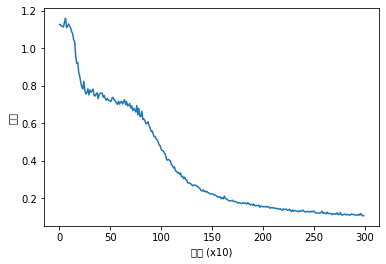

In [18]:
# 학습 결과 플롯
plt.plot(np.arange(len(loss_list)), loss_list, label='train')
plt.xlabel('반복 (x10)')
plt.ylabel('손실')
plt.show()

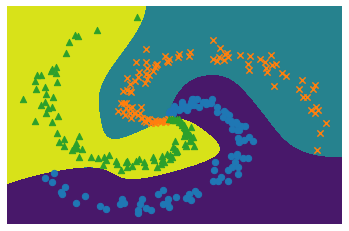

In [22]:
# 경계 영역 플롯
h = 0.001
x_min, x_max = x[:, 0].min() - .1, x[:, 0].max() + .1
y_min, y_max = x[:, 1].min() - .1, x[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X = np.c_[xx.ravel(), yy.ravel()]
score = model.predict(X)
predict_cls = np.argmax(score, axis=1)
Z = predict_cls.reshape(xx.shape)
plt.contourf(xx, yy, Z)
plt.axis('off')

# 데이터점 플롯
x, t = spiral.load_data()
N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])
plt.show()

## 1.4.4 Trainer 클래스

신경망의 학습에서는 앞 절에서 본 학습 코드가 자주 필요하다. 하지만 매번 같은 코드를 다시 작성하는 일은 비효율적이며 지루할 수 있다.<br>
본 도서에서는 학습을 수행하는 역할을 Trainer라는 클래스로 제공한다.

* Trainer 클래스는 common/trainer.py에 있다.
    * 초기화 메서드는 신경망(모델)과 옵티마이저를 인수로 받는다.
    
 <br>
 
 model = TwoLayerNet(...)<br>
 optimizer = SGD(lr=1.0)<br>
 trainer = Trainer(model, optimizer)<br>
 * fit()메서드를 호출해 학습을 시작한다.
 * Trainer class는 plot()메서드도 제공한다.
   * 이 메서드는 fit()에서 기록한 손실을 그래프로 그려준다.

| 에폭 1 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 2 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 3 |  반복 1 / 10 | 시간 0[s] | 손실 1.13
| 에폭 4 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 5 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 6 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 7 |  반복 1 / 10 | 시간 0[s] | 손실 1.14
| 에폭 8 |  반복 1 / 10 | 시간 0[s] | 손실 1.16
| 에폭 9 |  반복 1 / 10 | 시간 0[s] | 손실 1.11
| 에폭 10 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 11 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 12 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 13 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 14 |  반복 1 / 10 | 시간 0[s] | 손실 1.09
| 에폭 15 |  반복 1 / 10 | 시간 0[s] | 손실 1.08
| 에폭 16 |  반복 1 / 10 | 시간 0[s] | 손실 1.04
| 에폭 17 |  반복 1 / 10 | 시간 0[s] | 손실 1.03
| 에폭 18 |  반복 1 / 10 | 시간 0[s] | 손실 0.94
| 에폭 19 |  반복 1 / 10 | 시간 0[s] | 손실 0.92
| 에폭 20 |  반복 1 / 10 | 시간 0[s] | 손실 0.92
| 에폭 21 |  반복 1 / 10 | 시간 0[s] | 손실 0.87
| 에폭 22 |  반복 1 / 10 | 시간 0[s] | 손실 0.85
| 에폭 23 |  반복 1 / 10 | 시간 0[s] | 손실 0.80
| 에폭 24 |  반복 1 / 10 | 시간 0[s] | 손실 0.79
| 에폭 25 |  반복 1 / 10 | 시간

C:\Users\Lee\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Lee\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Lee\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Lee\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Lee\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Lee\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49892 missing from current font.
  f

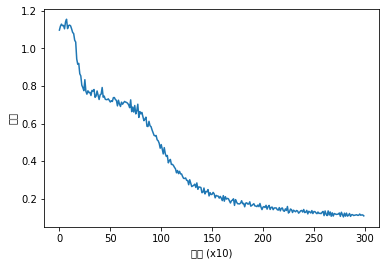

In [26]:
# Trainer class를 사용해 학습을 수행하는 코드

import sys
sys.path.append('..')
from common.optimizer import SGD
from common.trainer import Trainer
from dataset import spiral
# TwoLayerNet은 위에서 작성

max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

x, t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

trainer = Trainer(model, optimizer)  # Trainer 클래스는 초기화 메서드로 모델과 옵티마이져를 인수로 받는다.
trainer.fit(x, t, max_epoch, batch_size, eval_interval=10)
trainer.plot()

## Appendix I - matplotlib Scatter plot

reference: https://stackoverflow.com/questions/21654635/scatter-plots-in-pandas-pyplot-how-to-plot-by-category

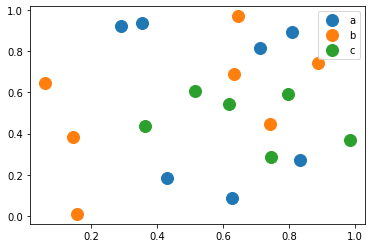

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
np.random.seed(1974)

# Generate Data
num = 20
x, y = np.random.random((2, num))
labels = np.random.choice(['a', 'b', 'c'], num)
df = pd.DataFrame(dict(x=x, y=y, label=labels))

groups = df.groupby('label')

# Plot
fig, ax = plt.subplots()
ax.margins(0.05)  # Optional, just add 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=name)
ax.legend()

plt.show()

## Appendix II - Python Path

Q. jupyteter lab에서는 아무 문제 없이 동작하던 코드가 VScode로 넘어가면서 먹통이 되었다...

In [16]:
import os 
import sys

print(sys.path)  # 시스템 path

['C:\\Users\\Lee\\Documents\\steve-home\\05_Deep-Learning-from-Scratch-2-RNN.NLP\\Chap1. 신경망 복습', 'C:\\Users\\Lee\\Anaconda3\\python37.zip', 'C:\\Users\\Lee\\Anaconda3\\DLLs', 'C:\\Users\\Lee\\Anaconda3\\lib', 'C:\\Users\\Lee\\Anaconda3', '', 'C:\\Users\\Lee\\Anaconda3\\lib\\site-packages', 'C:\\Users\\Lee\\Anaconda3\\lib\\site-packages\\win32', 'C:\\Users\\Lee\\Anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\Users\\Lee\\Anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\Users\\Lee\\Anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\Lee\\.ipython', '..', '..', '..', '..', '..']


In [17]:
# 현재 디렉토리의 path
print(os.getcwd())

C:\Users\Lee\Documents\steve-home\05_Deep-Learning-from-Scratch-2-RNN.NLP\Chap1. 신경망 복습


In [18]:
# https://stackoverflow.com/questions/16771894/python-nameerror-global-name-file-is-not-defined

os.path.abspath("__file__")

'C:\\Users\\Lee\\Documents\\steve-home\\05_Deep-Learning-from-Scratch-2-RNN.NLP\\Chap1. 신경망 복습\\__file__'

In [19]:
# 현재 파일이 위치한 디렉터리

# print(os.path.abspath(__file__))
print(os.path.dirname(os.path.abspath("__file__")))  


C:\Users\Lee\Documents\steve-home\05_Deep-Learning-from-Scratch-2-RNN.NLP\Chap1. 신경망 복습


In [20]:
sys.path.append('..')
print(sys.path)

['C:\\Users\\Lee\\Documents\\steve-home\\05_Deep-Learning-from-Scratch-2-RNN.NLP\\Chap1. 신경망 복습', 'C:\\Users\\Lee\\Anaconda3\\python37.zip', 'C:\\Users\\Lee\\Anaconda3\\DLLs', 'C:\\Users\\Lee\\Anaconda3\\lib', 'C:\\Users\\Lee\\Anaconda3', '', 'C:\\Users\\Lee\\Anaconda3\\lib\\site-packages', 'C:\\Users\\Lee\\Anaconda3\\lib\\site-packages\\win32', 'C:\\Users\\Lee\\Anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\Users\\Lee\\Anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\Users\\Lee\\Anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\Lee\\.ipython', '..', '..', '..', '..', '..', '..']


In [21]:
from dataset import spiral

x, t = spiral.load_data()
print(x.shape)
print(t.shape)

(300, 2)
(300, 3)


In [22]:
print(os.getcwd())

C:\Users\Lee\Documents\steve-home\05_Deep-Learning-from-Scratch-2-RNN.NLP\Chap1. 신경망 복습
